In [1]:
#tHE Clothing Fashion-MNIST is a dataset of images from Zalando (Europe's biggest online fashion retailer)
# it consists of 60000 training samples and 10000 testing samples
# Each sample is a 28*28 grayscale image associated with a label from 10 classes
# http://yann.lecun.com/exdb/mnist/

10 classes are:


1.   T-shirt/top

1.   Trouser

1.   Pullover

1.   Dress

1.   Coat

1.   Sandal
2.   Shirt


2.   Sneaker


2.   bag


2.   Ankle Boot





In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist


In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [5]:
print(train_labels)


[9 0 0 ... 3 0 5]


In [6]:
# define classname
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape)


(60000, 28, 28)


In [8]:
print(test_images.shape)

(10000, 28, 28)


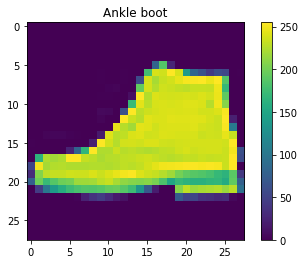

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
train_images = train_images/255.0
test_images = test_images/255.0

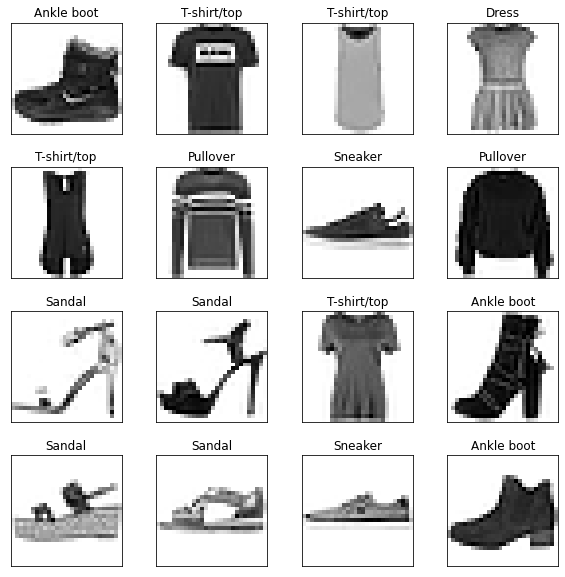

In [11]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

In [ ]:
# Architecting CNN model
# The CNN has two main components: The feature extractor composed of a set of convolutional and pooling layers and the classifier backend similar to a regular neural network

In [12]:
# we need to reshape the data into 4-dimensions
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(X_train.shape)

(60000, 28, 28, 1)


The first dimension is the number of samples


---
The fourth dimension is the appended one representing the grayscale images


In [13]:
# random seed in tensorflow for reproducility
tf.random.set_seed(42)
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
# add the first convolutional layers with 32 small-sized 3*3 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [14]:
# Convolutional layer is followed by a max-pooling layer with a 2*2 filter
model.add(layers.MaxPooling2D((2, 2)))

In [15]:
# second convolutional layer with 64 3*3 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [16]:
# third convolutional layer with 128 3*3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#The resulting filter maps are flatten to provide features to the downstream classifier backend
model.add(layers.Flatten())


In [17]:
#Classifier backend 
model.add(layers.Dense(64, activation='relu'))


In [18]:
#output with 10 nodes demonstrating 10 classes
model.add(layers.Dense(10, activation='softmax'))


In [19]:
model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

The benefits of applying pooling are:


1.   avoiding overfitting
2.   Reducing training cost



In [21]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10) # batch size is 32 by default

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.6691 - accuracy: 0.7537 - val_loss: 0.3419 - val_accuracy: 0.8790
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3114 - accuracy: 0.8856 - val_loss: 0.3618 - val_accuracy: 0.8696
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2654 - accuracy: 0.9022 - val_loss: 0.2875 - val_accuracy: 0.8958
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2278 - accuracy: 0.9162 - val_loss: 0.2695 - val_accuracy: 0.9050
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2030 - accuracy: 0.9243 - val_loss: 0.2645 - val_accuracy: 0.9044
Epoch 6/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.1812 - accuracy: 0.9312 - val_loss: 0.2889 - val_accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1604 - accuracy: 0.9403 - val_loss: 0.2664 -

In [22]:
# 96% on training set and 91% on the testing set
# double check the performance
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 2s - loss: 0.2956 - accuracy: 0.9132
Accuracy on test set:  0.9132000207901001


In [23]:
predictions = model.predict(X_test)

In [24]:
print(predictions[0])

[7.0009092e-13 1.0523170e-08 1.5516394e-11 3.3706544e-11 1.2819192e-10
 5.0729369e-08 8.2108447e-14 9.7706716e-06 8.4720467e-11 9.9999022e-01]


In [25]:
import numpy as np

print('Predicted label for the first test sample: ', np.argmax(predictions[0]))

Predicted label for the first test sample:  9


In [26]:
print('True label for the first test sample: ', test_labels[0])

True label for the first test sample:  9


In [27]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

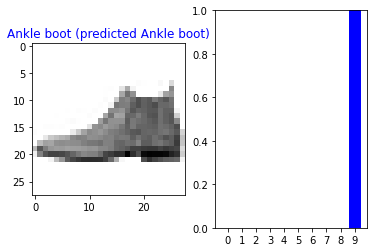

In [28]:
plot_image_prediction(0, test_images, predictions, test_labels, class_names)

In [29]:
# 
filters, _ = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max-f_min)

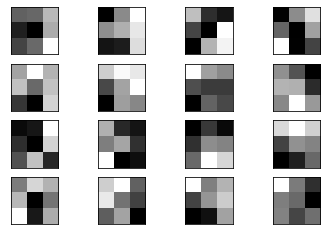

In [30]:
n_filters = 16
for i in range(n_filters):
  filter = filters[:, :, :, i]
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(filter[:, :, 0], cmap='gray')

plt.show()

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
n_small = 500
X_train = X_train[:n_small]
train_labels = train_labels[:n_small]
print(X_train.shape)

(500, 28, 28, 1)


In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [35]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=20, batch_size=40)

Epoch 1/20
13/13 [==============================] - 3s 230ms/step - loss: 2.1556 - accuracy: 0.2655 - val_loss: 1.5974 - val_accuracy: 0.3579
Epoch 2/20
13/13 [==============================] - 3s 220ms/step - loss: 1.4406 - accuracy: 0.4469 - val_loss: 1.2414 - val_accuracy: 0.5318
Epoch 3/20
13/13 [==============================] - 3s 220ms/step - loss: 1.0029 - accuracy: 0.6473 - val_loss: 0.9527 - val_accuracy: 0.6803
Epoch 4/20
13/13 [==============================] - 3s 217ms/step - loss: 0.7664 - accuracy: 0.7643 - val_loss: 0.7879 - val_accuracy: 0.7271
Epoch 5/20
13/13 [==============================] - 3s 219ms/step - loss: 0.6871 - accuracy: 0.7879 - val_loss: 0.7541 - val_accuracy: 0.7276
Epoch 6/20
13/13 [==============================] - 3s 224ms/step - loss: 0.5359 - accuracy: 0.8048 - val_loss: 0.8521 - val_accuracy: 0.7102
Epoch 7/20
13/13 [==============================] - 3s 225ms/step - loss: 0.5083 - accuracy: 0.8176 - val_loss: 0.7001 - val_accuracy: 0.7568
Epoch 

In [36]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 3s - loss: 0.7518 - accuracy: 0.7951
Accuracy on test set: 0.7950999736785889


The accuracy  without augmentation has a classification accuracy of 79.5%

In [37]:
datagen = ImageDataGenerator(height_shift_range=3,
                              horizontal_flip=True
                              )

In [38]:
model_aug = tf.keras.models.clone_model(model)

In [39]:
model_aug.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [40]:
train_generator = datagen.flow(X_train, train_labels, seed=42, batch_size=40)
model_aug.fit(train_generator, epochs=50, validation_data=(X_test, test_labels))

Epoch 1/50
13/13 [==============================] - 3s 251ms/step - loss: 2.1620 - accuracy: 0.2409 - val_loss: 1.6978 - val_accuracy: 0.3521
Epoch 2/50
13/13 [==============================] - 3s 234ms/step - loss: 1.5609 - accuracy: 0.4116 - val_loss: 1.1748 - val_accuracy: 0.5150
Epoch 3/50
13/13 [==============================] - 3s 235ms/step - loss: 1.0000 - accuracy: 0.6363 - val_loss: 0.8608 - val_accuracy: 0.6998
Epoch 4/50
13/13 [==============================] - 3s 234ms/step - loss: 0.8666 - accuracy: 0.7043 - val_loss: 0.9253 - val_accuracy: 0.6922
Epoch 5/50
13/13 [==============================] - 3s 232ms/step - loss: 0.8293 - accuracy: 0.7071 - val_loss: 0.7793 - val_accuracy: 0.7280
Epoch 6/50
13/13 [==============================] - 3s 234ms/step - loss: 0.6889 - accuracy: 0.7655 - val_loss: 0.7532 - val_accuracy: 0.7452
Epoch 7/50
13/13 [==============================] - 3s 234ms/step - loss: 0.6145 - accuracy: 0.7718 - val_loss: 0.7003 - val_accuracy: 0.7476
Epoch 

In [41]:
test_loss, test_acc = model_aug.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 2s - loss: 0.7529 - accuracy: 0.8062
Accuracy on test set:  0.8062000274658203
